<h1 style="color: #ffffff; background-color: #5DADE2; padding: 15px 20px; 
           border-radius: 8px; text-align: center; font-family: Arial, sans-serif;">
  üîç Transaction Fraud Detection üí≥
</h1>

<h3 style="color: #ffffff; background-color: #5DADE2; padding: 15px 20px; 
           border-radius: 8px; text-align: center; font-family: Arial, sans-serif;">Importing Library</h3>

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, BaggingClassifier, ExtraTreesClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
import warnings 
warnings.filterwarnings("ignore")

<h3 style="color: #ffffff; background-color: #5DADE2; padding: 15px 20px; 
           border-radius: 8px; text-align: center; font-family: Arial, sans-serif;">Loading the Dataset</h3>

In [2]:
df = pd.read_csv("bank_transactions_data_2.csv")
df.head()

TransactionID AccountID  TransactionAmount      TransactionDate  \
0      TX000001   AC00128              14.09  2023-04-11 16:29:14   
1      TX000002   AC00455             376.24  2023-06-27 16:44:19   
2      TX000003   AC00019             126.29  2023-07-10 18:16:08   
3      TX000004   AC00070             184.50  2023-05-05 16:32:11   
4      TX000005   AC00411              13.45  2023-10-16 17:51:24   

  TransactionType   Location DeviceID      IP Address MerchantID Channel  \
0           Debit  San Diego  D000380  162.198.218.92       M015     ATM   
1           Debit    Houston  D000051     13.149.61.4       M052     ATM   
2           Debit       Mesa  D000235  215.97.143.157       M009  Online   
3           Debit    Raleigh  D000187  200.13.225.150       M002  Online   
4          Credit    Atlanta  D000308    65.164.3.100       M091  Online   

   CustomerAge CustomerOccupation  TransactionDuration  LoginAttempts  \
0           70             Doctor                   81              1   
1           68             Doctor                  141              1   
2           19            Student                   56              1   
3           26            Student                   25              1   
4           26            Student                  198              1   

   AccountBalance PreviousTransactionDate  
0         5112.21     2024-11-04 08:08:08  
1        13758.91     2024-11-04 08:09:35  
2         1122.35     2024-11-04 08:07:04  
3         8569.06     2024-11-04 08:09:06  
4         7429.40     2024-11-04 08:06:39

<h3 style="color: #ffffff; background-color: #5DADE2; padding: 15px 20px; 
           border-radius: 8px; text-align: center; font-family: Arial, sans-serif;">General Overview of Data</h3>

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2512 entries, 0 to 2511
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   TransactionID            2512 non-null   object 
 1   AccountID                2512 non-null   object 
 2   TransactionAmount        2512 non-null   float64
 3   TransactionDate          2512 non-null   object 
 4   TransactionType          2512 non-null   object 
 5   Location                 2512 non-null   object 
 6   DeviceID                 2512 non-null   object 
 7   IP Address               2512 non-null   object 
 8   MerchantID               2512 non-null   object 
 9   Channel                  2512 non-null   object 
 10  CustomerAge              2512 non-null   int64  
 11  CustomerOccupation       2512 non-null   object 
 12  TransactionDuration      2512 non-null   int64  
 13  LoginAttempts            2512 non-null   int64  
 14  AccountBalance          

In [4]:
df.isnull().sum()

TransactionID              0
AccountID                  0
TransactionAmount          0
TransactionDate            0
TransactionType            0
Location                   0
DeviceID                   0
IP Address                 0
MerchantID                 0
Channel                    0
CustomerAge                0
CustomerOccupation         0
TransactionDuration        0
LoginAttempts              0
AccountBalance             0
PreviousTransactionDate    0
dtype: int64

In [5]:
df.duplicated().sum()

0

In [6]:
df.describe()

TransactionAmount  CustomerAge  TransactionDuration  LoginAttempts  \
count        2512.000000  2512.000000          2512.000000    2512.000000   
mean          297.593778    44.673965           119.643312       1.124602   
std           291.946243    17.792198            69.963757       0.602662   
min             0.260000    18.000000            10.000000       1.000000   
25%            81.885000    27.000000            63.000000       1.000000   
50%           211.140000    45.000000           112.500000       1.000000   
75%           414.527500    59.000000           161.000000       1.000000   
max          1919.110000    80.000000           300.000000       5.000000   

       AccountBalance  
count     2512.000000  
mean      5114.302966  
std       3900.942499  
min        101.250000  
25%       1504.370000  
50%       4735.510000  
75%       7678.820000  
max      14977.990000

<h3 style="color: #ffffff; background-color: #5DADE2; padding: 15px 20px; 
           border-radius: 8px; text-align: center; font-family: Arial, sans-serif;">Exploratory Data Analysis (EDA)</h3>

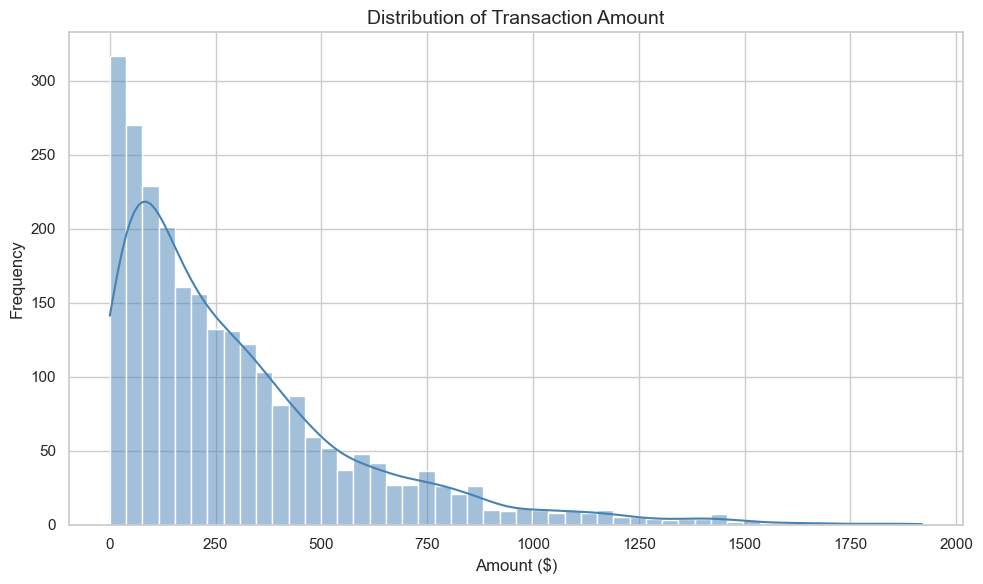

In [7]:
sns.set(style='whitegrid')

#Distribution of Transaction
plt.figure(figsize=(10,6))
sns.histplot(df['TransactionAmount'], bins=50, kde=True, color='steelblue')
plt.title('Distribution of Transaction Amount', fontsize=14)
plt.xlabel("Amount ($)")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

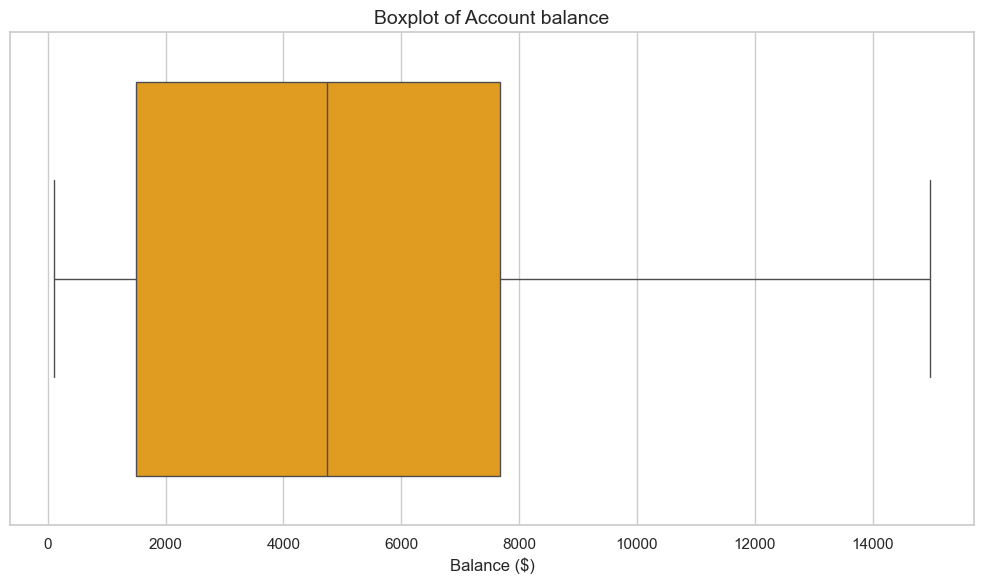

In [8]:
# Boxplot of account balance
plt.figure(figsize=(10,6))
sns.boxplot(x=df['AccountBalance'], color='orange')
plt.title("Boxplot of Account balance", fontsize=14)
plt.xlabel("Balance ($)")
plt.tight_layout()
plt.show()

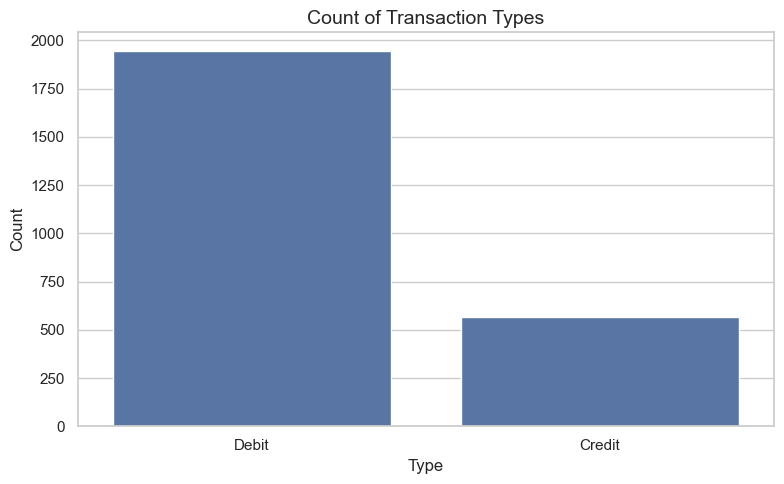

In [9]:
# Countplot of transaction type
plt.figure(figsize=(8,5))
sns.countplot(data=df, x='TransactionType')
plt.title("Count of Transaction Types", fontsize=14)
plt.xlabel('Type')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

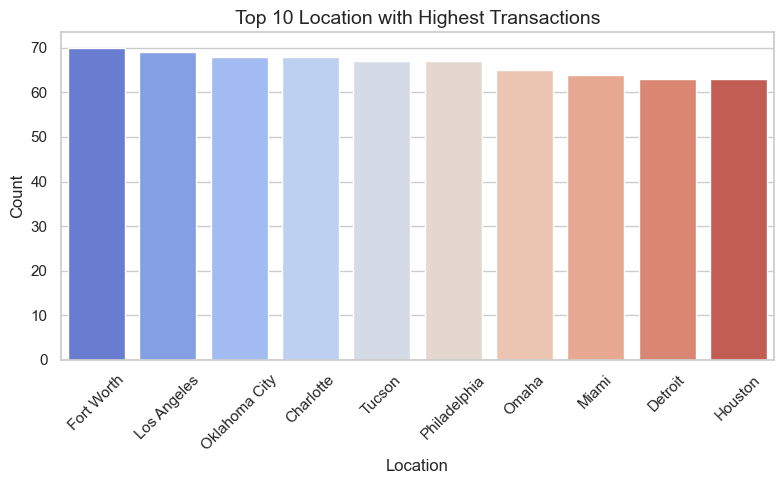

In [10]:
# Top 10 locations by Transaction Count
plt.figure(figsize=(8,5))
top_locations = df['Location'].value_counts().nlargest(10)
sns.barplot(x=top_locations.index, y=top_locations.values, palette='coolwarm')
plt.title("Top 10 Location with Highest Transactions", fontsize=14)
plt.xlabel("Location")
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

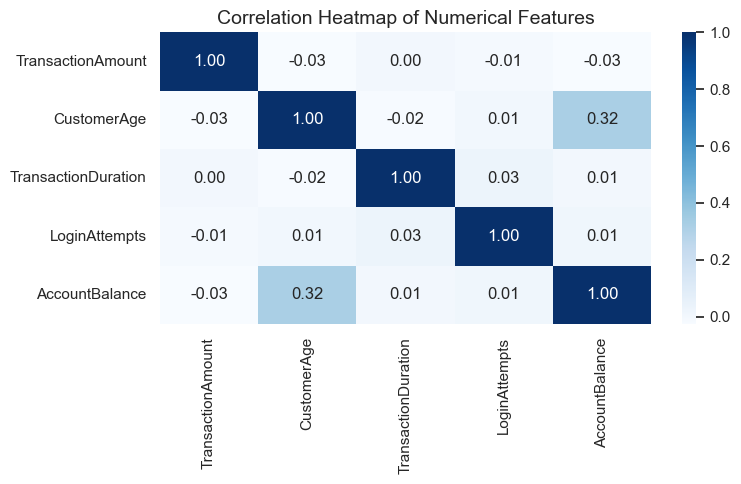

In [11]:
# Correlation Heatmap of Numeric Features
plt.figure(figsize=(8,5))
numeric_cols = df.select_dtypes(include='number')
sns.heatmap(numeric_cols.corr(), annot=True, cmap='Blues', fmt='.2f')
plt.title("Correlation Heatmap of Numerical Features", fontsize=14)
plt.tight_layout()
plt.show()

<h3 style="color: #ffffff; background-color: #5DADE2; padding: 12px 20px; 
           border-radius: 8px; text-align: center; font-family: Arial, sans-serif;">Calculating Time Difference Between Transactions (in Seconds)</h3>

In [12]:
df['TransactionDate'] = pd.to_datetime(df['TransactionDate'])
df['PreviousTransactionDate'] = pd.to_datetime(df['PreviousTransactionDate'])
df['TimeDelta'] = (df['TransactionDate'] - df['PreviousTransactionDate']).dt.total_seconds()

In [13]:
df.head()

TransactionID AccountID  TransactionAmount     TransactionDate  \
0      TX000001   AC00128              14.09 2023-04-11 16:29:14   
1      TX000002   AC00455             376.24 2023-06-27 16:44:19   
2      TX000003   AC00019             126.29 2023-07-10 18:16:08   
3      TX000004   AC00070             184.50 2023-05-05 16:32:11   
4      TX000005   AC00411              13.45 2023-10-16 17:51:24   

  TransactionType   Location DeviceID      IP Address MerchantID Channel  \
0           Debit  San Diego  D000380  162.198.218.92       M015     ATM   
1           Debit    Houston  D000051     13.149.61.4       M052     ATM   
2           Debit       Mesa  D000235  215.97.143.157       M009  Online   
3           Debit    Raleigh  D000187  200.13.225.150       M002  Online   
4          Credit    Atlanta  D000308    65.164.3.100       M091  Online   

   CustomerAge CustomerOccupation  TransactionDuration  LoginAttempts  \
0           70             Doctor                   81              1   
1           68             Doctor                  141              1   
2           19            Student                   56              1   
3           26            Student                   25              1   
4           26            Student                  198              1   

   AccountBalance PreviousTransactionDate   TimeDelta  
0         5112.21     2024-11-04 08:08:08 -49477134.0  
1        13758.91     2024-11-04 08:09:35 -42823516.0  
2         1122.35     2024-11-04 08:07:04 -41694656.0  
3         8569.06     2024-11-04 08:09:06 -47403415.0  
4         7429.40     2024-11-04 08:06:39 -33228915.0

<h3 style="color: #ffffff; background-color: #5DADE2; padding: 12px 20px; 
           border-radius: 8px; text-align: center; font-family: Arial, sans-serif;">Delete Unnecessary Feature</h3>

In [14]:
drop_cols = ['TransactionID', 'AccountID', 'TransactionDate', 'PreviousTransactionDate', 'IP Address']
df.drop(columns=drop_cols, inplace=True)

In [15]:
df.head()

TransactionAmount TransactionType   Location DeviceID MerchantID Channel  \
0              14.09           Debit  San Diego  D000380       M015     ATM   
1             376.24           Debit    Houston  D000051       M052     ATM   
2             126.29           Debit       Mesa  D000235       M009  Online   
3             184.50           Debit    Raleigh  D000187       M002  Online   
4              13.45          Credit    Atlanta  D000308       M091  Online   

   CustomerAge CustomerOccupation  TransactionDuration  LoginAttempts  \
0           70             Doctor                   81              1   
1           68             Doctor                  141              1   
2           19            Student                   56              1   
3           26            Student                   25              1   
4           26            Student                  198              1   

   AccountBalance   TimeDelta  
0         5112.21 -49477134.0  
1        13758.91 -42823516.0  
2         1122.35 -41694656.0  
3         8569.06 -47403415.0  
4         7429.40 -33228915.0

<h3 style="color: #ffffff; background-color: #5DADE2; padding: 12px 20px; 
           border-radius: 8px; text-align: center; font-family: Arial, sans-serif;">Feature Encoding</h3>

In [16]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
label_cols = ['TransactionType', 'Location', 'DeviceID', 'Channel', 'CustomerOccupation', 'MerchantID']
for col in label_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])

In [17]:
df.head()

TransactionAmount  TransactionType  Location  DeviceID  MerchantID  \
0              14.09                1        36       365          14   
1             376.24                1        15        50          51   
2             126.29                1        23       229           8   
3             184.50                1        33       182           1   
4              13.45                0         1       298          90   

   Channel  CustomerAge  CustomerOccupation  TransactionDuration  \
0        0           70                   0                   81   
1        0           68                   0                  141   
2        2           19                   3                   56   
3        2           26                   3                   25   
4        2           26                   3                  198   

   LoginAttempts  AccountBalance   TimeDelta  
0              1         5112.21 -49477134.0  
1              1        13758.91 -42823516.0  
2              1         1122.35 -41694656.0  
3              1         8569.06 -47403415.0  
4              1         7429.40 -33228915.0

<h3 style="color: #ffffff; background-color: #5DADE2; padding: 12px 20px; 
           border-radius: 8px; text-align: center; font-family: Arial, sans-serif;">Modeling for detecting Fraud</h3>

In [18]:
X = df
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [19]:
from sklearn.ensemble import IsolationForest

iso_forest = IsolationForest(
    n_estimators=100,
    contamination=0.02,
    random_state=42
)

In [20]:
iso_forest.fit(X_scaled)
y_pred = iso_forest.predict(X_scaled)
anomaly_scores = iso_forest.decision_function(X_scaled)
unique, counts = np.unique(y_pred, return_counts=True)
anomaly_summary = dict(zip(unique, counts))
print("Isolation Forest Result Summary")
print(anomaly_summary)

Isolation Forest Result Summary
{-1: 51, 1: 2461}


<h3 style="color: #ffffff; background-color: #5DADE2; padding: 12px 20px; 
           border-radius: 8px; text-align: center; font-family: Arial, sans-serif;">Visulization for Fraud Transaction</h3>

In [21]:
df_anomaly = pd.DataFrame(X_scaled, columns=df.columns)
df_anomaly['Anomaly'] = y_pred
df_anomaly['Score'] = anomaly_scores

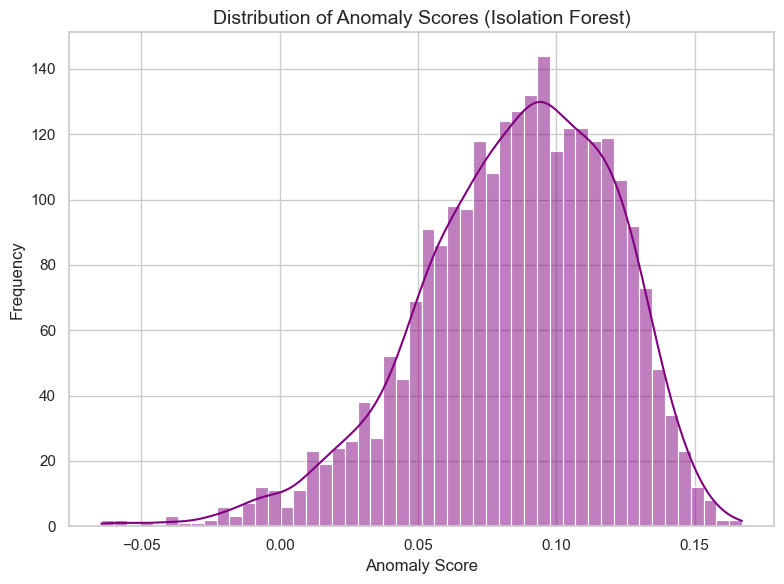

In [22]:
plt.figure(figsize=(8, 6))
sns.histplot(df_anomaly['Score'], bins=50, kde=True, color='purple')
plt.title('Distribution of Anomaly Scores (Isolation Forest)', fontsize=14)
plt.xlabel('Anomaly Score')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

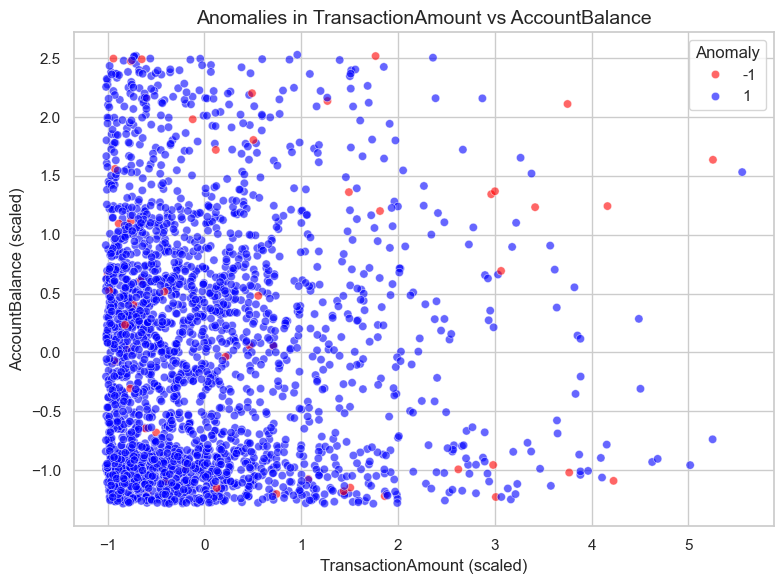

In [23]:
plt.figure(figsize=(8, 6))
sns.scatterplot(
    x=df_anomaly['TransactionAmount'],
    y=df_anomaly['AccountBalance'],
    hue=df_anomaly['Anomaly'],
    palette={1: 'blue', -1: 'red'},
    alpha=0.6
)
plt.title('Anomalies in TransactionAmount vs AccountBalance', fontsize=14)
plt.xlabel('TransactionAmount (scaled)')
plt.ylabel('AccountBalance (scaled)')
plt.legend(title='Anomaly')
plt.tight_layout()
plt.show()

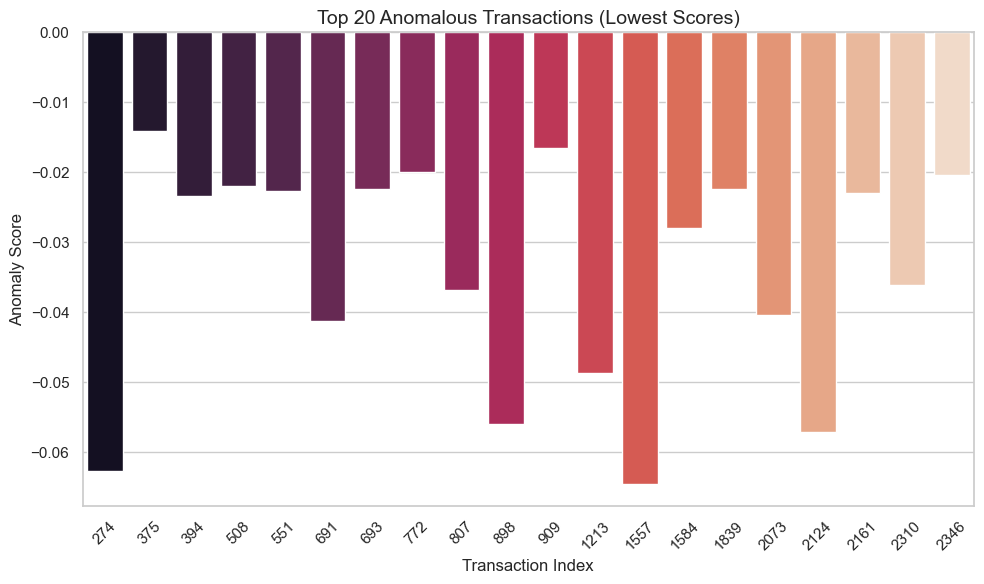

In [24]:
top20 = df_anomaly[df_anomaly['Anomaly'] == -1].sort_values(by='Score').head(20)

plt.figure(figsize=(10, 6))
sns.barplot(x=top20.index, y=top20['Score'], palette='rocket')
plt.title('Top 20 Anomalous Transactions (Lowest Scores)', fontsize=14)
plt.xlabel('Transaction Index')
plt.ylabel('Anomaly Score')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<h3 style="color: #ffffff; background-color: #5DADE2; padding: 12px 20px; 
           border-radius: 8px; text-align: center; font-family: Arial, sans-serif;">
    Creating 'IsFraud' Feature as a Target Feature Using Isolation Forest</h3>

In [25]:
iso_forest.fit(X_scaled)
df['IsFraud'] = iso_forest.predict(X_scaled)
df['IsFraud'] = df['IsFraud'].map({1: 0, -1: 1})

In [26]:
df["IsFraud"].value_counts()

IsFraud
0    2461
1      51
Name: count, dtype: int64

In [27]:
df.head()

TransactionAmount  TransactionType  Location  DeviceID  MerchantID  \
0              14.09                1        36       365          14   
1             376.24                1        15        50          51   
2             126.29                1        23       229           8   
3             184.50                1        33       182           1   
4              13.45                0         1       298          90   

   Channel  CustomerAge  CustomerOccupation  TransactionDuration  \
0        0           70                   0                   81   
1        0           68                   0                  141   
2        2           19                   3                   56   
3        2           26                   3                   25   
4        2           26                   3                  198   

   LoginAttempts  AccountBalance   TimeDelta  IsFraud  
0              1         5112.21 -49477134.0        0  
1              1        13758.91 -42823516.0        0  
2              1         1122.35 -41694656.0        0  
3              1         8569.06 -47403415.0        0  
4              1         7429.40 -33228915.0        0

In [28]:
df.shape

(2512, 13)

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2512 entries, 0 to 2511
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   TransactionAmount    2512 non-null   float64
 1   TransactionType      2512 non-null   int32  
 2   Location             2512 non-null   int32  
 3   DeviceID             2512 non-null   int32  
 4   MerchantID           2512 non-null   int32  
 5   Channel              2512 non-null   int32  
 6   CustomerAge          2512 non-null   int64  
 7   CustomerOccupation   2512 non-null   int32  
 8   TransactionDuration  2512 non-null   int64  
 9   LoginAttempts        2512 non-null   int64  
 10  AccountBalance       2512 non-null   float64
 11  TimeDelta            2512 non-null   float64
 12  IsFraud              2512 non-null   int64  
dtypes: float64(3), int32(6), int64(4)
memory usage: 196.4 KB


<h3 style="color: #ffffff; background-color: #5DADE2; padding: 12px 20px; 
           border-radius: 8px; text-align: center; font-family: Arial, sans-serif;">
    Model Train with Various Algorithm </h3>

In [30]:
x = df.drop("IsFraud", axis = 1)
y = df["IsFraud"]

In [31]:
x_scaled = scaler.fit_transform(x)
x_scaled

array([[-9.71275470e-01,  5.40537760e-01,  1.22171432e+00, ...,
        -2.06793649e-01, -5.36635052e-04, -8.00762030e-01],
       [ 2.69439606e-01,  5.40537760e-01, -4.92416055e-01, ...,
        -2.06793649e-01,  2.21647159e+00, -7.67064794e-02],
       [-5.86881623e-01,  5.40537760e-01,  1.60585994e-01, ...,
        -2.06793649e-01, -1.02353413e+00,  4.61375656e-02],
       ...,
       [-9.21461864e-01,  5.40537760e-01,  1.22171432e+00, ...,
        -2.06793649e-01, -4.43928023e-01,  4.40578644e-01],
       [-3.82419727e-01,  5.40537760e-01, -9.00542336e-01, ...,
        -2.06793649e-01, -8.55705373e-01, -1.23331832e+00],
       [-1.86762574e-01, -1.85000952e+00, -3.29165543e-01, ...,
        -2.06793649e-01, -1.27765152e+00, -1.32733233e+00]])

In [32]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
xtrain, xtest, ytrain, ytest = train_test_split(x_scaled,y,test_size=.3, random_state= 42)

In [33]:
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "AdaBoost": AdaBoostClassifier(),
    "Bagging": BaggingClassifier(),
    "Extra Trees": ExtraTreesClassifier(),
    "SVM": SVC(),
    "Decision Tree": DecisionTreeClassifier(),
    "KNN": KNeighborsClassifier(),
    "Naive Bayes": GaussianNB(),
    "MLP Neural Net": MLPClassifier(max_iter=1000),
    "LDA": LinearDiscriminantAnalysis(),
    "QDA": QuadraticDiscriminantAnalysis()
}

In [34]:
accuracy_scores = {}

for name, model in models.items():
    try:
        model.fit(xtrain, ytrain)
        ypred = model.predict(xtest)
        accuracy = accuracy_score(ytest, ypred)
        accuracy_scores[name] = accuracy
    except Exception as e:
        accuracy_scores[name] = f"Error: {str(e)}"

for model_name, score in sorted(accuracy_scores.items(), key=lambda x: x[1] if isinstance(x[1], float) else 0, reverse=True):
    print(f"{model_name}: {score:.4f}" if isinstance(score, float) else f"{model_name}: {score}")

Logistic Regression: 0.9894
Random Forest: 0.9881
AdaBoost: 0.9881
Bagging: 0.9867
Extra Trees: 0.9841
SVM: 0.9841
MLP Neural Net: 0.9841
Gradient Boosting: 0.9828
KNN: 0.9828
QDA: 0.9828
LDA: 0.9814
Naive Bayes: 0.9761
Decision Tree: 0.9695


<h3 style="color: #ffffff; background-color: #5DADE2; padding: 12px 20px; 
           border-radius: 8px; text-align: center; font-family: Arial, sans-serif;">
   Model Train with Balence Data</h3>

In [35]:
xtrain, xtest, ytrain, ytest = train_test_split(x_scaled, y, test_size=0.3, random_state=42, stratify=y)

smote = SMOTE(random_state=42)
xtrain_balanced, ytrain_balanced = smote.fit_resample(xtrain, ytrain)

models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "AdaBoost": AdaBoostClassifier(),
    "Bagging": BaggingClassifier(),
    "Extra Trees": ExtraTreesClassifier(),
    "SVM": SVC(),
    "Decision Tree": DecisionTreeClassifier(),
    "KNN": KNeighborsClassifier(),
    "Naive Bayes": GaussianNB(),
    "MLP Neural Net": MLPClassifier(max_iter=1000),
    "LDA": LinearDiscriminantAnalysis(),
    "QDA": QuadraticDiscriminantAnalysis()
}

accuracy_scores = {}

for name, model in models.items():
    try:
        model.fit(xtrain_balanced, ytrain_balanced)
        ypred = model.predict(xtest)
        accuracy = accuracy_score(ytest, ypred)
        accuracy_scores[name] = accuracy
    except Exception as e:
        accuracy_scores[name] = f"Error: {str(e)}"

print("Model Accuracies on Imbalanced Dataset (Handled with SMOTE):\n")
for model_name, score in sorted(accuracy_scores.items(), key=lambda x: x[1] if isinstance(x[1], float) else 0, reverse=True):
    print(f"{model_name}: {score:.4f}" if isinstance(score, float) else f"{model_name}: {score}")

Model Accuracies on Imbalanced Dataset (Handled with SMOTE):

Random Forest: 0.9788
Gradient Boosting: 0.9788
Extra Trees: 0.9788
MLP Neural Net: 0.9788
SVM: 0.9775
AdaBoost: 0.9761
Decision Tree: 0.9761
Bagging: 0.9708
KNN: 0.9562
Logistic Regression: 0.9496
LDA: 0.9496
QDA: 0.9456
Naive Bayes: 0.9164
